In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import sklearn
import seaborn as sns
from sklearn.utils import resample #for downsampling data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV #for cross validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA #for perform PCA to data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score, multilabel_confusion_matrix


In [14]:
df = pd.read_csv('zero.csv'
)
# df = df[0].str.split(',', expand=True)
df

,1,2,3,4,5,6,7,8,9,10,...,118,119,120,121,122,123,124,125,126,Output
0,0.476367,0.353816,5.926383e-07,0.449234,0.432987,-0.027095,0.443237,0.508904,-0.050162,0.439319,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Gerakan 1
1,0.582900,0.024890,4.294760e-07,0.495858,0.021948,-0.014463,0.428040,0.064142,-0.027092,0.387340,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Gerakan 1
2,0.593543,0.046800,5.186289e-07,0.508483,0.028019,-0.025900,0.436337,0.054680,-0.046170,0.383537,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Gerakan 1
3,0.509751,0.404736,1.966143e-07,0.475957,0.473717,-0.021131,0.464124,0.538058,-0.036481,0.455469,...,0.626022,0.421149,-0.065481,0.633794,0.471344,-0.074966,0.644385,0.504347,-0.079752,Gerakan 1
4,0.670381,0.093354,4.045614e-07,0.571721,0.073039,-0.042296,0.472582,0.124671,-0.055009,0.418037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Gerakan 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
8000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
8001,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
8002,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None


In [15]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,117,118,119,120,121,122,123,124,125,126
count,8004.000000,8004.000000,8.004000e+03,8004.000000,8004.000000,8004.000000,8004.000000,8004.000000,8004.000000,8004.000000,...,8004.000000,8004.000000,8004.000000,8004.000000,8004.000000,8004.000000,8004.000000,8004.000000,8004.000000,8004.000000
mean,0.353747,0.124856,2.776475e-07,0.338867,0.141358,-0.017819,0.330288,0.186688,-0.027988,0.327859,...,-0.002401,0.036567,0.027053,-0.003318,0.036791,0.028385,-0.003449,0.037122,0.029315,-0.003439
std,0.285307,0.175549,4.023518e-07,0.266903,0.176347,0.021800,0.261865,0.185571,0.032398,0.264231,...,0.014941,0.141587,0.107027,0.018895,0.142613,0.111855,0.020106,0.144310,0.115970,0.020967
min,0.000000,-0.167731,-1.465026e-06,0.000000,-0.125987,-0.140717,0.000000,-0.029207,-0.191173,0.000000,...,-0.233891,0.000000,0.000000,-0.284497,0.000000,0.000000,-0.280853,0.000000,0.000000,-0.277600
25%,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-0.034297,0.000000,0.000000,-0.052715,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.438878,0.055536,2.808417e-07,0.434131,0.082239,-0.011306,0.423029,0.150908,-0.020360,0.406121,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.591401,0.208912,6.038569e-07,0.569304,0.220222,0.000000,0.553272,0.298684,0.000000,0.544757,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.925653,0.732092,1.646733e-06,0.904424,0.713392,0.108657,0.872866,0.696077,0.169108,0.872668,...,0.140836,0.856089,0.773641,0.153222,0.880503,0.826577,0.150671,0.902954,0.898517,0.167417


In [16]:
df.dtypes

1         float64
2         float64
3         float64
4         float64
5         float64
           ...   
123       float64
124       float64
125       float64
126       float64
Output     object
Length: 127, dtype: object

In [ ]:
# df_csv_data = df.to_csv('df.csv', index = True)
# print('\nCSV String:\n', df_csv_data)

In [17]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (8004, 126)
Labels shape = (8004,)


In [18]:
#Split dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [19]:
x_train

,1,2,3,4,5,6,7,8,9,10,...,117,118,119,120,121,122,123,124,125,126
1001,0.473272,0.130993,3.776693e-07,0.538363,0.130792,-0.031097,0.589917,0.179155,-0.048657,0.623200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6093,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7766,0.051416,0.671611,3.912898e-07,0.032393,0.634264,-0.001497,0.025971,0.585704,-0.008159,0.032392,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3669,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7796,0.049945,0.670879,3.857341e-07,0.046988,0.635435,-0.003276,0.045352,0.585176,-0.008512,0.049502,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0.651049,0.035054,2.681126e-07,0.559708,0.058757,-0.001966,0.508533,0.145918,-0.010252,0.506094,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3264,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1653,0.610472,0.234355,7.589207e-07,0.554268,0.242273,-0.038658,0.507500,0.276947,-0.062867,0.482947,...,-0.091368,0.396034,0.193952,-0.128489,0.365992,0.240121,-0.149487,0.335922,0.272625,-0.161635
2607,0.610956,0.299403,2.736151e-07,0.594065,0.379657,-0.019721,0.580330,0.458609,-0.035108,0.565383,...,0.000728,0.610785,0.426426,-0.009951,0.589907,0.471512,-0.010806,0.576736,0.512498,-0.010911


In [ ]:
# # #NStandarize data
# from sklearn.preprocessing import StandardScaler
# X_train_std = StandardScaler().fit(x_train)
# X_test_std = StandardScaler().fit(x_test)
# X_test_std

In [22]:
#Use gridsearchCV for finding better parameter for C and Gamma
param_grid = [
    {'C': [0.5, 1, 10, 100], #Note Values C>0
    'gamma': ['scale', 1, 0.1, 0.01, 0.001],
    'degree':[1,2,3,4,5,6,7,8,9,10],
    'kernel': ['poly'],
    }
]
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy'
)

optimal_params.fit(x_train, y_train)
print(optimal_params.best_params_)

{'C': 100, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}


In [23]:
# print how our model looks after hyper-parameter tuning
print(optimal_params.best_estimator_)

SVC(C=100, degree=5, kernel='poly')


In [24]:
#Train SVM
#From GridSearchCV:
#{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
#{'C': 100, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}

svm = SVC(C=100, degree=5, gamma='scale', kernel='poly')
svm.fit(x_train, y_train)

SVC(C=100, degree=5, kernel='poly')

In [25]:
#Make predict
y_pred = svm.predict(x_test)
y_pred

array(['Gerakan 5', 'None', 'None', ..., 'None', 'Gerakan 2', 'Gerakan 4'],
      dtype=object)

In [28]:
#Calculate metrics score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
print("Acc = ",accuracy)
print("Precision = ", precision)
print("Recall = ", recall)
print("F1 = ", f1)

print("=================================================================")
f1_mac = f1_score(y_test, y_pred, average='macro')
recall_mac = recall_score(y_test, y_pred, average='macro')
precision_mac = precision_score(y_test, y_pred, average='macro')
print("Precision macro = ", precision_mac)
print("Recall macro = ", recall_mac)
print("F1 macro = ", f1_mac)

Acc =  0.7607745159275453
Precision =  0.7607745159275453
Recall =  0.7607745159275453
F1 =  0.7607745159275454
Precision macro =  0.8809791263982211
Recall macro =  0.7592515569440665
F1 macro =  0.7791513808393936


In [29]:
cf_matrix = confusion_matrix(y_test, y_pred)
multilabel_confusion_matrix(y_test, y_pred)

array([[[1344,   16],
        [  31,  210]],

       [[1361,    6],
        [  16,  218]],

       [[1345,   11],
        [  69,  176]],

       [[1368,    6],
        [  94,  133]],

       [[1408,    4],
        [  50,  139]],

       [[1367,    1],
        [ 120,  113]],

       [[1030,  339],
        [   3,  229]]], dtype=int64)

<AxesSubplot:title={'center':'Confusion Matrix - Mediapipe SVM5'}>

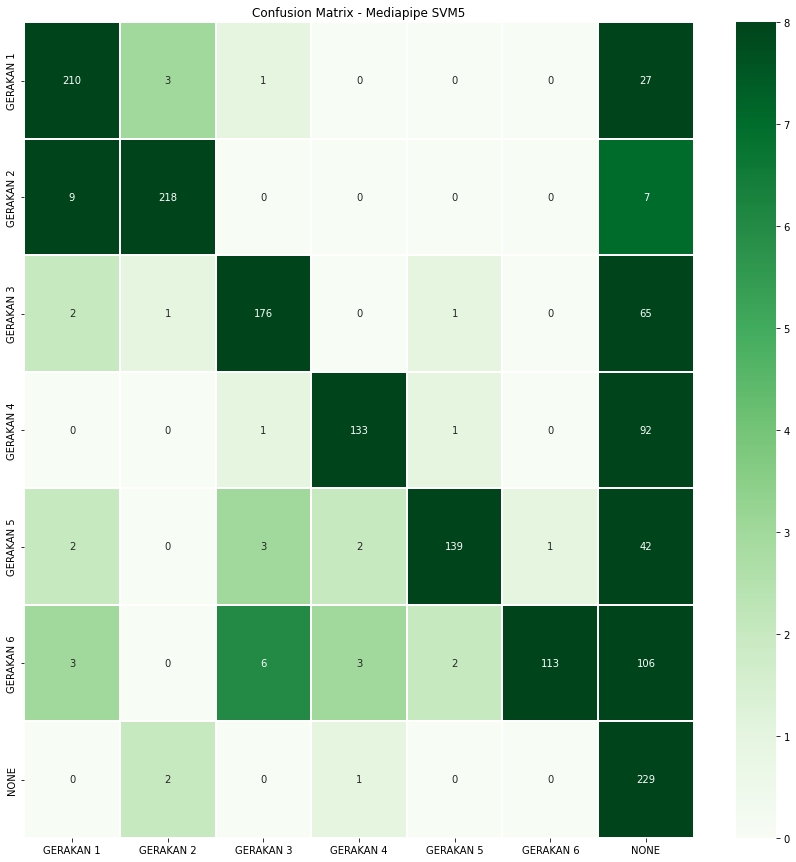

In [35]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(15, 15))

ax.set_title("Confusion Matrix - Mediapipe SVM5")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Greens, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [ ]:
# import pickle

# # save model
# with open(name.pkl,'wb') as f:
#     pickle.dump(svm,f)